In [44]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [46]:
# take only data entries within November
df_nov = df[df['month'] == 11]
df_dec = df[df['month'] == 12]
# re-index the dataframe
df_nov = df_nov.reset_index(drop=True)
df_dec = df_dec.reset_index(drop=True)
df_nov.head(), df_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286457 entries, 0 to 286456
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           286457 non-null  object 
 1   timestamp                    286457 non-null  float64
 2   hour                         286457 non-null  int64  
 3   day                          286457 non-null  int64  
 4   month                        286457 non-null  int64  
 5   datetime                     286457 non-null  object 
 6   timezone                     286457 non-null  object 
 7   source                       286457 non-null  object 
 8   destination                  286457 non-null  object 
 9   cab_type                     286457 non-null  object 
 10  product_id                   286457 non-null  object 
 11  name                         286457 non-null  object 
 12  price                        263771 non-null  float64
 13 

(                                     id     timestamp  hour  day  month  \
 0  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
 1  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
 2  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
 3  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
 4  462816a3-820d-408b-8549-0b39e82f65ac  1.543209e+09     5   26     11   
 
               datetime          timezone            source  \
 0  2018-11-27 02:00:23  America/New_York  Haymarket Square   
 1  2018-11-28 01:00:22  America/New_York  Haymarket Square   
 2  2018-11-30 04:53:02  America/New_York  Haymarket Square   
 3  2018-11-29 03:49:20  America/New_York  Haymarket Square   
 4  2018-11-26 05:03:00  America/New_York          Back Bay   
 
                destination cab_type  ... precipIntensityMax uvIndexTime  \
 0            North Station     Lyft  ...             0.1300  1543251600   
 1        

In [47]:
# export the df_nov
df_nov.to_csv('rideshare_nov.csv', index=False)
df_dec.to_csv('rideshare_dec.csv', index=False)

In [48]:
df_nov

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
1,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
2,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
3,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
4,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286452,c2ff162b-7a47-421c-b75d-b1292dee12af,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,North End,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
286453,cc793176-621c-42c5-94dc-3c9ffb5b34d6,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,North End,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
286454,d1a50035-184d-4e63-8aa1-813b497e293e,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
286455,0f13e495-cd0a-4b87-8219-b9a4ae06ece7,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800


## Divide and Conquer
**To apply divide and conquer algorithms to the dataset for ridesharing optimization, I will first set up a scenario and apply algorithms to the data in that scenario.**

**As public datasets are all datas collected from real world travel records using applictions such as Uber and Lyft, therefore we have to extract data entries happened in a certain area and time period to simulate a scenario.**

**Assume we have a driver currently locating in Theatre District and is on his way to Boston University on 2018-11-27, around 8am. We now need to find out the earliest request sent out by the users in order to avoid long waiting time.**

In [49]:
# get data entries travel from Theatre District to Boston University
df_nov_theatre = df_nov[df_nov['source'] == 'Theatre District']
df_nov_theatre = df_nov_theatre[df_nov_theatre['destination'] == 'Boston University']

# get data entries on 2018-11-27
df_nov_theatre = df_nov_theatre[df_nov_theatre['day'] == 27]
# get data entries between 8:00 and 9:00
df_nov_theatre = df_nov_theatre[df_nov_theatre['hour'] == 8]

# re-index the dataframe
df_nov_theatre = df_nov_theatre.reset_index(drop=True)
df_nov_theatre

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,419ff18c-d1a6-4db8-a72b-688e143445e4,1.543307e+09,8,27,11,2018-11-27 08:15:23,America/New_York,Theatre District,Boston University,Lyft,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
1,5f5cad62-d0e9-4fd9-a70c-c054c756162d,1.543309e+09,8,27,11,2018-11-27 08:57:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
2,ae1cd13f-6928-4a19-b32d-deea9c24aa7c,1.543308e+09,8,27,11,2018-11-27 08:39:22,America/New_York,Theatre District,Boston University,Lyft,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
3,2eb23313-bda8-4dd5-a77b-a2d4b28fdab9,1.543307e+09,8,27,11,2018-11-27 08:15:22,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
4,de5a70b2-081b-4a2f-84e1-0ba87282efbe,1.543309e+09,8,27,11,2018-11-27 08:51:22,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
5,fa643337-e7ba-4a87-879c-93b77011a372,1.543309e+09,8,27,11,2018-11-27 08:51:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
6,04c0c33f-188c-478d-b22b-918c35b9249f,1.543309e+09,8,27,11,2018-11-27 08:54:22,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
7,7becbbeb-1898-40d0-bedb-bdb165684c79,1.543309e+09,8,27,11,2018-11-27 08:54:22,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
8,7d12ff4b-9d28-496f-8eaf-3acc632ef1fd,1.543309e+09,8,27,11,2018-11-27 08:54:22,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
9,310ef385-2817-430c-b6f6-8e41c2284539,1.543308e+09,8,27,11,2018-11-27 08:36:22,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000


**We have extracted the data entries happened in the area of Theatre District and Boston University on 2018-11-27, around 8am, let's assume these data entries are the requests from passengers that need a ride from Theatre District to Boston University, and can be accepted by the driver.**

In [50]:
# save data entries to csv file
df_nov_theatre.to_csv('rideshare_nov_theatre.csv', index=False)

In [51]:
# Implementing the QuickSort algorithm
def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi-1)  # Before pi
        quicksort(arr, pi+1, high) # After pi

def partition(arr, low, high):
    pivot = arr[high] # pivot
    i = low-1         # Index of smaller element
    for j in range(low, high):
        if arr[j] < pivot:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

In [52]:
# Convert 'datetime' to Python datetime objects, then to timestamps for sorting
df_nov_theatre['datetime'] = pd.to_datetime(df_nov_theatre['datetime'])
df_nov_theatre['timestamp'] = df_nov_theatre['datetime'].astype('int64')

# Create a copy of the dataset for sorting
sorted_data = df_nov_theatre.copy()

In [53]:
# Apply QuickSort on the 'timestamp' column
timestamp_list = sorted_data['timestamp'].tolist()
quicksort(timestamp_list, 0, len(timestamp_list) - 1)

# Reordering the dataframe according to the sorted timestamps
sorted_data = sorted_data.set_index('timestamp').loc[timestamp_list].reset_index()

# Display the sorted dataset
sorted_data

,timestamp,id,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1543305622000000000,61d0796f-fcef-4509-910d-9095ef398193,8,27,11,2018-11-27 08:00:22,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
1,1543306163000000000,9a389649-c037-4112-a4a3-1844165eff6e,8,27,11,2018-11-27 08:09:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
2,1543306163000000000,a361458a-9e11-4bc9-b8a1-f2a46b35b7f0,8,27,11,2018-11-27 08:09:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
3,1543306163000000000,ad22fed4-763f-42bd-8d0e-e0940705fbb5,8,27,11,2018-11-27 08:09:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
4,1543306163000000000,9a389649-c037-4112-a4a3-1844165eff6e,8,27,11,2018-11-27 08:09:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1543309043000000000,f426d90d-d2d0-4d51-bf92-d794c228e9d4,8,27,11,2018-11-27 08:57:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
161,1543309043000000000,fa5911f2-54fa-4bee-8b12-d0fae937a09f,8,27,11,2018-11-27 08:57:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
162,1543309043000000000,5f5cad62-d0e9-4fd9-a70c-c054c756162d,8,27,11,2018-11-27 08:57:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
163,1543309043000000000,f426d90d-d2d0-4d51-bf92-d794c228e9d4,8,27,11,2018-11-27 08:57:23,America/New_York,Theatre District,Boston University,Uber,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000


In [54]:
# Print out the earliest data entry for the driver
sorted_data.iloc[0]

timestamp                                       1543305622000000000
id                             61d0796f-fcef-4509-910d-9095ef398193
hour                                                              8
day                                                              27
month                                                            11
datetime                                        2018-11-27 08:00:22
timezone                                           America/New_York
source                                             Theatre District
destination                                       Boston University
cab_type                                                       Uber
product_id                     997acbb5-e102-41e1-b155-9df7de0a73f2
name                                                       UberPool
price                                                           7.5
distance                                                       2.62
surge_multiplier                                

**By implementing Divide and Conquer algorithms, such as Quick Sort, we can optimize user waiting times, ensuring that users who request a cab first within a given time period are prioritized for earlier pickup.**

## **Greedy Algorithm**

**To apply greedy algorithms to the dataset for ridesharing optimization, I will first set up a scenario and extract some data from the dataset to be used as user requests to apply the greedy algorithm.**

**Below I will do some visualization on the dataset to make sure the scenario we are going to set up is reasonable.**

In [55]:
# Create a frequncy plot of the distance of the rides
# Use the original dataset
distances = df['distance'].tolist()

# print the maximum distance
max(distances)

7.86

In [56]:
# Divide the distances into 10 groups:0-1, 1-3, 3-5,5-7,7+
distances_0_1 = []
distances_1_3 = []
distances_3_5 = []
distances_5_7 = []
distances_7 = []

for distance in distances:
    if distance < 1:
        distances_0_1.append(distance)
    elif distance < 3:
        distances_1_3.append(distance)
    elif distance < 5:
        distances_3_5.append(distance)
    elif distance < 7:
        distances_5_7.append(distance)
    elif distance >= 7:
        distances_7.append(distance)
    # Skip the data entries with no distance
    else:
        continue

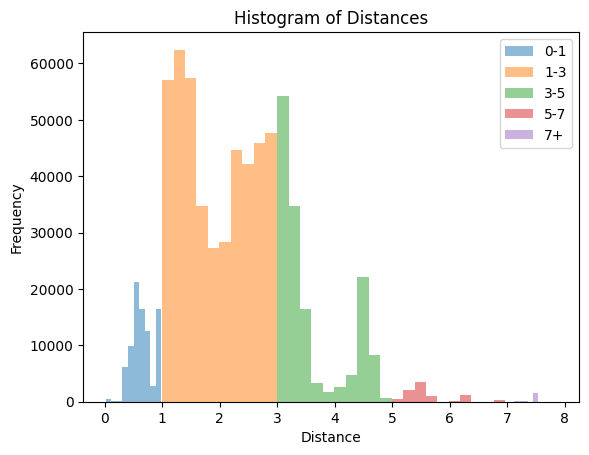

In [57]:
# Plot histogram for the distances
plt.hist(distances_0_1, bins=10, alpha=0.5, label='0-1')
plt.hist(distances_1_3, bins=10, alpha=0.5, label='1-3')
plt.hist(distances_3_5, bins=10, alpha=0.5, label='3-5')
plt.hist(distances_5_7, bins=10, alpha=0.5, label='5-7')
plt.hist(distances_7, bins=10, alpha=0.5, label='7+')
plt.legend(loc='upper right')
plt.title('Histogram of Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

**From the visualization we can see that data entries has a high frequency with a distance of 1-3 miles, now we move to setting up the scenario.**

**Assume a driver is currently in Haymarket Square, his amount of petrol remaining is very lacked and he is on his way to a petro station in the area of Northeastern University. Assume that his remaining petrol is available for 12 miles drive (excluding his petrol consumption from the destination of his last ride to the petrol station), and he want to gain a maximum amount of money by picking up passengers on his way to the petro station.**

**To simulate this scenario, I will extract data entries happened in the area of Haymarket Square and Theatre District, and the data entries on 2018-11-27 will be used.**

In [86]:
# Extract useful data entries according to the scenario
# Using the original dataset df, get data entries travel from Haymarket Square to Theatre District, from Haymarket Square to Haymarket Square, from Theatre District to Theatre District.
# Filter the data
df_h_to_t = df_nov[df_nov['source'] == 'Haymarket Square']
df_h_to_t = df_h_to_t[df_h_to_t['destination'] == 'Theatre District']
df_h_to_t = df_h_to_t[df_h_to_t['day'] == 27]

# Reset the index of the filtered DataFrame
df_h_to_t = df_h_to_t.reset_index(drop=True)
df_h_to_t

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,ee029d73-c9ad-463d-a15e-ba20fac8c292,1.543283e+09,1,27,11,2018-11-27 01:42:21,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
1,b5b889f1-3e4a-4eff-afa3-62aa3ffe5160,1.543358e+09,22,27,11,2018-11-27 22:30:24,America/New_York,Haymarket Square,Theatre District,Uber,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
2,4f0e9df0-6e75-4e4f-8ba0-be6b04233a6e,1.543297e+09,5,27,11,2018-11-27 05:36:22,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
3,8220a380-a083-439d-9273-09cfaaacf644,1.543348e+09,19,27,11,2018-11-27 19:54:22,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
4,b50ec086-2960-4594-b9bb-f2f5ad689380,1.543332e+09,15,27,11,2018-11-27 15:12:22,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,615c354a-094f-449b-ba78-0dfcfe55de5c,1.543341e+09,17,27,11,2018-11-27 17:45:22,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
1039,c77e820b-ae6e-4922-ba5e-6ffe6023be86,1.543341e+09,17,27,11,2018-11-27 17:45:22,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
1040,faff6364-48f5-46de-ae81-ccd21c9ba014,1.543341e+09,17,27,11,2018-11-27 17:45:22,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
1041,7625910d-4acc-4444-abc6-9bb6f284d9b4,1.543318e+09,11,27,11,2018-11-27 11:27:22,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000


**To filter the data and simulate the scenario for another step, I visualise the time of the data entries.**

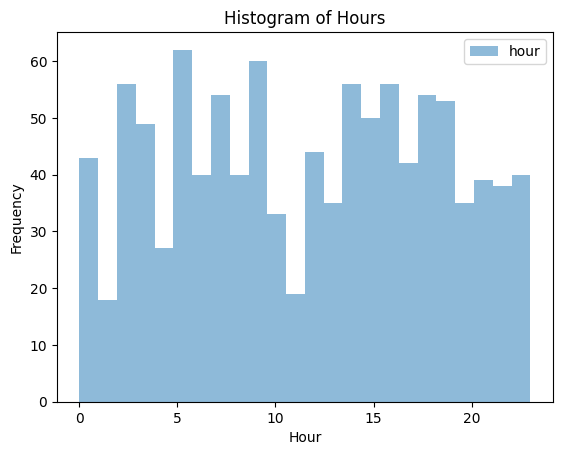

In [87]:
# Create histogram for hour
plt.hist(df_h_to_t['hour'], bins=24, alpha=0.5, label='hour')
plt.legend(loc='upper right')
plt.title('Histogram of Hours')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

**I will picked up data entries from 5am to 6am to simulate the scenario.**

In [88]:
df_greedy = df_h_to_t[df_h_to_t['hour'] == 5]

# Reset the index of the filtered DataFrame
df_greedy = df_greedy.reset_index(drop=True)

# Save the filtered DataFrame to csv file
df_greedy.to_csv('rideshare_greedy.csv', index=False)

df_greedy

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,4f0e9df0-6e75-4e4f-8ba0-be6b04233a6e,1.543297e+09,5,27,11,2018-11-27 05:36:22,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
1,ee90ccab-aa97-4645-a6a3-c468e51c4dfc,1.543295e+09,5,27,11,2018-11-27 05:00:23,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
2,64ecb1ed-4cc3-462d-bbdd-414d85f99a0d,1.543296e+09,5,27,11,2018-11-27 05:15:22,America/New_York,Haymarket Square,Theatre District,Uber,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
3,6933bcf9-bdbe-43d4-89c8-eec65ce80872,1.543296e+09,5,27,11,2018-11-27 05:18:22,America/New_York,Haymarket Square,Theatre District,Uber,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
4,08bc53bc-245f-449c-9f6a-1ecbcb1c2568,1.543298e+09,5,27,11,2018-11-27 05:48:22,America/New_York,Haymarket Square,Theatre District,Uber,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,08e0ef79-458c-43fa-b26c-8d9cced6dc76,1.543298e+09,5,27,11,2018-11-27 05:54:23,America/New_York,Haymarket Square,Theatre District,Uber,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
58,20f4ff7b-782e-4e15-a994-2850d6bd1eb7,1.543298e+09,5,27,11,2018-11-27 05:54:23,America/New_York,Haymarket Square,Theatre District,Uber,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
59,6ffdc103-f43b-44a9-9019-5d4b0ded4084,1.543298e+09,5,27,11,2018-11-27 05:54:23,America/New_York,Haymarket Square,Theatre District,Uber,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
60,18340dc8-9877-4def-890a-26f786c85086,1.543298e+09,5,27,11,2018-11-27 05:57:22,America/New_York,Haymarket Square,Theatre District,Uber,...,0.143,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000


**Here we assume all the data entries are available to be accepted by the driver to form a connected route, which means, the pickup points of the next ride is the same as the destination of the current ride, as in this dataset, there are no entries that have source and destination in the same area. And without map or route planner information, it is hard to fully simulate the scenario just as it in real world.**

In [90]:
# Keep only id, distance, price columns
df_greedy = df_greedy[['id', 'distance', 'price']]
df_greedy

,id,distance,price
0,4f0e9df0-6e75-4e4f-8ba0-be6b04233a6e,1.28,16.5
1,ee90ccab-aa97-4645-a6a3-c468e51c4dfc,1.27,16.5
2,64ecb1ed-4cc3-462d-bbdd-414d85f99a0d,1.16,26.0
3,6933bcf9-bdbe-43d4-89c8-eec65ce80872,1.16,28.0
4,08bc53bc-245f-449c-9f6a-1ecbcb1c2568,1.14,7.5
...,...,...,...
57,08e0ef79-458c-43fa-b26c-8d9cced6dc76,1.16,8.5
58,20f4ff7b-782e-4e15-a994-2850d6bd1eb7,1.16,17.0
59,6ffdc103-f43b-44a9-9019-5d4b0ded4084,1.16,8.5
60,18340dc8-9877-4def-890a-26f786c85086,1.18,6.5


In [91]:
# export the df_greedy
df_greedy.to_csv('df_greedy.csv', index=False)

**After filtering the data and left only the columns useful for the scenario of maximizing the amount of money the driver can earn, we can now apply greedy algorithm to the data.**

**By implementing a fractional knapsack algorithm, we can optimize the amount of money the driver can earn, ensuring that the driver can earn the maximum amount of money by picking up passengers on his way to the petro station.**

In [100]:
# Calculate the price-to-distance ratio
df_greedy_copy = df_greedy.copy()
df_greedy_copy['price_distance_ratio'] = df_greedy_copy['price'] / df_greedy_copy['distance']

# Sort the DataFrame by the ratio in descending order
df_greedy_sorted = df_greedy.sort_values(by='price_distance_ratio', ascending=False)

# Initialize variables
max_distance = 12
total_distance = 0
total_revenue = 0
selected_rides = pd.DataFrame()

# Iterate over the sorted DataFrame
for index, row in df_greedy_sorted.iterrows():
    if total_distance + row['distance'] <= max_distance:
        selected_rides = pd.concat([selected_rides, row], axis=1)
        total_distance += row['distance']
        total_revenue += row['price']
        # Remove the selected ride from further consideration
        df_greedy_sorted = df_greedy_sorted.drop(index)
    else:
        # Find the next best ride by price within the remaining distance
        remaining_rides = df_greedy_sorted[df_greedy_sorted['distance'] <= max_distance - total_distance]
        if not remaining_rides.empty:
            best_remaining_ride = remaining_rides.sort_values(by='price', ascending=False).iloc[0]
            selected_rides = selected_rides.append(best_remaining_ride)
            total_distance += best_remaining_ride['distance']
            total_revenue += best_remaining_ride['price']
            # Remove the selected ride from further consideration
            df_greedy_sorted = df_greedy_sorted.drop(best_remaining_ride.name)

    if total_distance >= max_distance:
        break

# Output results
print("Total Revenue:", total_revenue)
print("Selected Rides:")
selected_rides

Total Revenue: 270.5
Selected Rides:


,3,13,30,53,48,35,2,22,43,41
id,6933bcf9-bdbe-43d4-89c8-eec65ce80872,84354505-a714-4b65-8162-e2a00267bada,a2c310b6-3185-4cda-b967-96a9bd45af19,b4d0e961-b726-49ba-b793-5f5b8e49b336,8fde527a-6cd8-42e3-8c76-09a85d6a067a,c679c6ed-a9fb-4457-86ce-2556a2c4456a,64ecb1ed-4cc3-462d-bbdd-414d85f99a0d,b28ffda4-be2a-4e23-9607-cc58225f313a,b1ca2f8a-5bdd-4933-a997-11d442dd4a4e,f57d8903-dd81-45b9-be43-9fe4f79975d6
distance,1.16,1.14,1.16,1.16,1.16,1.16,1.16,1.23,1.24,1.23
price,28.0,27.5,27.5,27.5,27.0,26.0,26.0,27.5,27.5,26.0
price_distance_ratio,24.137931,24.122807,23.706897,23.706897,23.275862,22.413793,22.413793,22.357724,22.177419,21.138211


**The basic logic of this algorithm is to sort the data entries by the ratio of the amount of money the driver can earn and the distance between the pickup point and the destination, and then pick up the data entries with the highest ratio first, until the driver's petrol is not enough for the next ride. However sometimes adding the next valuable data entry will exceed the driver's petrol limit, in this case, we will sort the rides left by their price and pick up the most valuable one.**

## **Randomized Algorithms**

